# Part II - How the day of the week and hours of the day affect the number of trips and duration of trips
## by Seckin Yılmaz

## Investigation Overview

> At the presentation, I mainly concentrated on examining how the day of the week and hours of the day affect the number and duration of trips. I chose these variables for the presentation because they displayed a distinct relationship without any uncertainty. To begin, I will display the count of trip data after it has been cleaned. After that, I will gradually introduce the categorical variables to gain a better understanding of the connection between each categorical variable and the trip count. This relationship will be further illustrated using clustered bar charts, box plots and scatter plots.


## Dataset Overview

> I had information about 183.412 people who used bikes. I collected details like how long their trips were and 16 other things, such as age, when they started, and when they finished. I removed the data for people with missing information and removed the outliers of duration, leaving us with 174.952 bike riders. 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe

df_bike = pd.read_csv('fordgobike-tripdata.csv')
 

In [3]:
# drop rows with missing values 
df_bike.dropna(inplace=True, axis=0)

# 1-convert start_time and end_time to data time format
df_bike['start_time'] = pd.to_datetime(df_bike['start_time'])
df_bike['end_time'] = pd.to_datetime(df_bike['end_time'])


# 2-convert `bike_id`, `start_station_id`,  `end_station_id` into string data types
df_bike['start_station_id'] =df_bike['start_station_id'].astype(int)  # It is performed because, float string is looked well on graphs.
df_bike['start_station_id'] =df_bike['start_station_id'].astype(str)
df_bike['end_station_id'] =df_bike['end_station_id'].astype(int)      # It is performed because, float string is looked well on graphs.
df_bike['end_station_id'] =df_bike['end_station_id'].astype(str)
df_bike['bike_id'] =df_bike['bike_id'].astype(str)

# 3-convert member birth year from float to int
df_bike['member_birth_year']=df_bike['member_birth_year'].astype(int)

# 4-convert bike share to 1,0
###df_bike["bike_share_for_all_trip"] = df_bike["bike_share_for_all_trip"].apply(lambda i: 1 if i == "Yes" else 0)

# 5.1 Take the years of start and end date
###df_bike['start_year'] = df_bike['start_time'].dt.year
###df_bike['end_year'] = df_bike['end_time'].dt.year

# 5.2 Calculate the age of the bikers
###df_bike['age']=(df_bike.end_year-df_bike.member_birth_year)

## Aditional calculations come from calculation of start_year and end_year for furher investigations.
df_bike['start_hour'] = df_bike['start_time'].dt.hour
df_bike['start_day_no'] = df_bike['start_time'].dt.day
df_bike['start_day'] = df_bike['start_time'].dt.day_name()
df_bike['start_month'] = df_bike['start_time'].dt.month_name()
df_bike['end_day'] = df_bike['end_time'].dt.day_name()
df_bike['end_month'] = df_bike['end_time'].dt.month_name()

df_bike['start_day'] = pd.Categorical(df_bike['start_day'], ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

In [4]:
# Drop the outliers form dataframe

q = df_bike["duration_sec"].quantile(0.995)
df_bike = df_bike[df_bike["duration_sec"] < q]

Text(0, 0.5, 'Frequency')

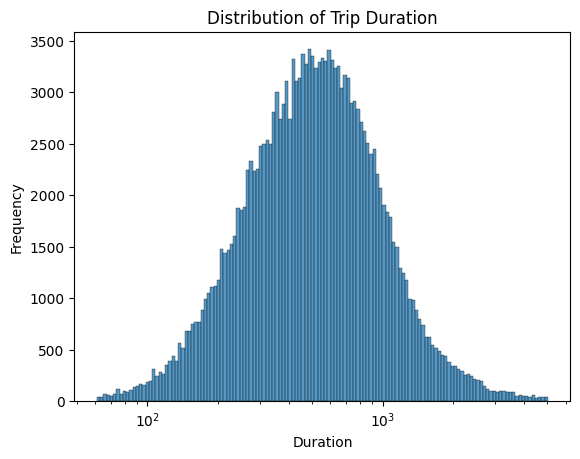

In [5]:
# New histogram of the duration

sb.histplot(data=df_bike, x="duration_sec", log_scale=True);
plt.title('Distribution of Trip Duration')
plt.xlabel('Duration')
plt.ylabel('Frequency')


## 1- Count of Trip by Day of the Week

> To investigate the relationship between day of the week and count of trip, a bar chart was plotted. The bar charts showed that number of rides on weekends is less than weekdays. 

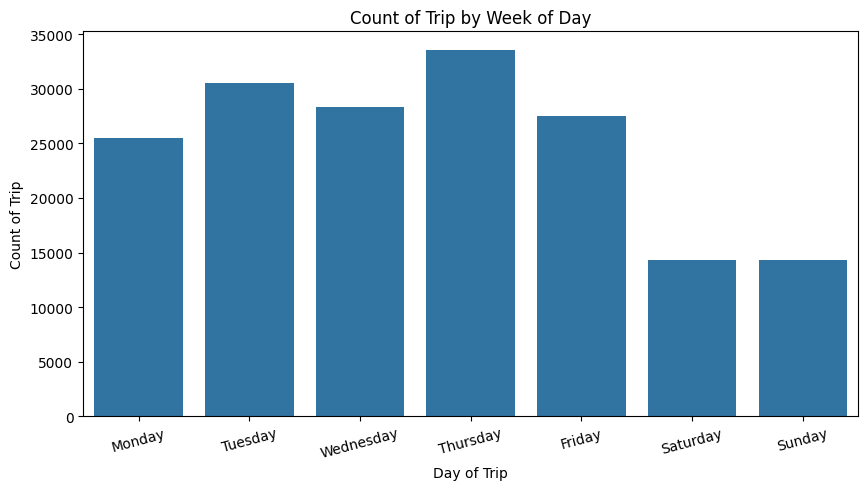

In [6]:
base_color = sb.color_palette()[0]

plt.figure(figsize = [10,5]) 
sb.countplot(data=df_bike, x='start_day', color=base_color)
plt.xticks(rotation = 15)

#add xlabel, ylabel and title
plt.title('Count of Trip by Week of Day')
plt.xlabel('Day of Trip')
plt.ylabel('Count of Trip')

plt.show()

## 2- Duration of Trip by Day of Week

> To investigate the relationship between day of the week and duration of trip, a box-plot was plotted. The box-plots showed that there were many outliers in the trip duration. Thus, to get a clear visual of the relationship, we limited the number of observations to 3000 seconds. The results showed that weekdays riders completed the trip faster than weekend bike riders. In an other saying Weekned riders are more tend to enjoy their trip.

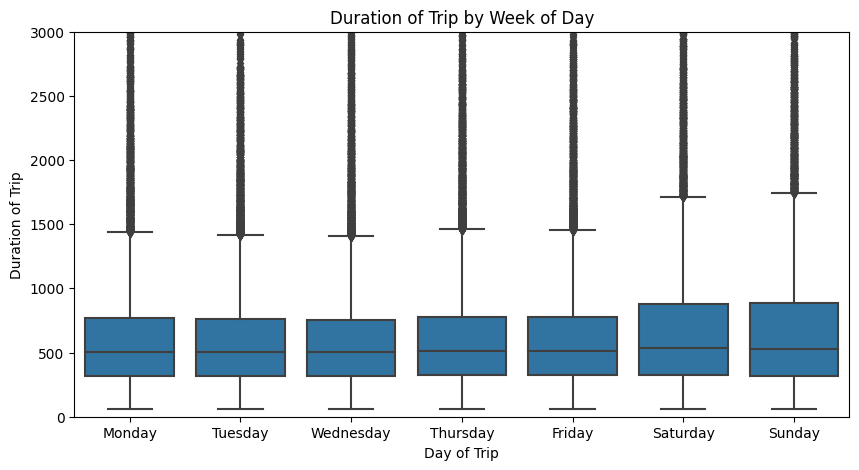

In [7]:
base_col=sb.color_palette()[0]
plt.figure(figsize=(10, 5))

sb.boxplot(x=df_bike['start_day'], y=df_bike['duration_sec'], color=base_col)

#add xlabel, ylabel and title
plt.title('Duration of Trip by Week of Day')
plt.xlabel('Day of Trip')
plt.ylabel('Duration of Trip')
plt.ylim(0, 3000)
plt.show()

## 3- Count of Trip by Hours of Day

> To investigate the relationship between hours of the day and number of trip, a scatter was plotted. The scatter plot showed that the number of rides is highest between **10:00 and 16:00** on weekends. Additionally, The number of rides is highest between **07:00 - 9:00 and 16:00 - 18:00** on weekdays.


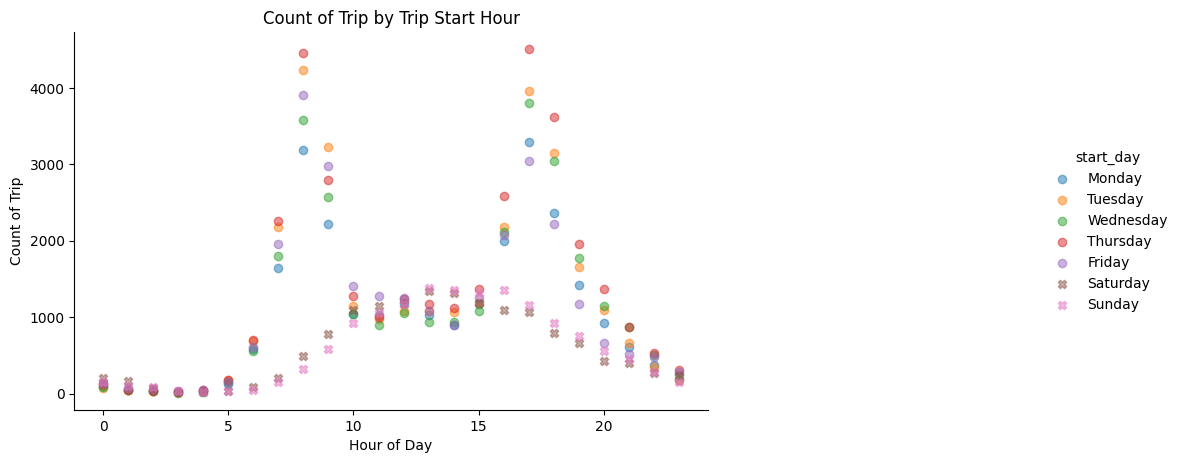

In [8]:
# Count of start station by day
df_hours = df_bike.groupby(['start_day','start_hour'])['start_hour'].count().reset_index(name='count')

#scatter plot of Station vs Count of Station by Day Name
g = sb.FacetGrid(data = df_hours, hue = 'start_day', hue_kws=dict(marker=["o","o","o","o","o","X","X"]))
g.map(plt.scatter, 'start_hour', 'count', alpha=0.5)
g.add_legend()

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(15, 5)
#add xlabel, ylabel and title
plt.title('Count of Trip by Trip Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Count of Trip')

plt.show()

## 4- Duration of Trip by Hour of Day

> To investigate the relationship between hours of the day and duration of trip, a scatter was plotted. We know that, weekends have high duration than weekdays. Even the number of rides is highest between **10:00 and 16:00** on weekends, high duraiton time is between **10:00 - 16:00 and 04:00 - 06:00**. Additionally, even the number of rides is highest between **07:00 - 9:00 and 16:00 - 18:00** on weekdays, high duraiton time is between **11:00 - 15:00 and 01:00 - 02:00**.


In [9]:
# Count of start station by day
df_hours_duration = df_bike["weekend"] = df_bike["start_day"].apply(lambda i: "Weekend" if i == "Sunday" or i == "Saturday" else "Weekdays")
df_hours_duration = df_bike.groupby(['weekend','start_hour'])['duration_sec'].mean().reset_index(name='avg_duration')

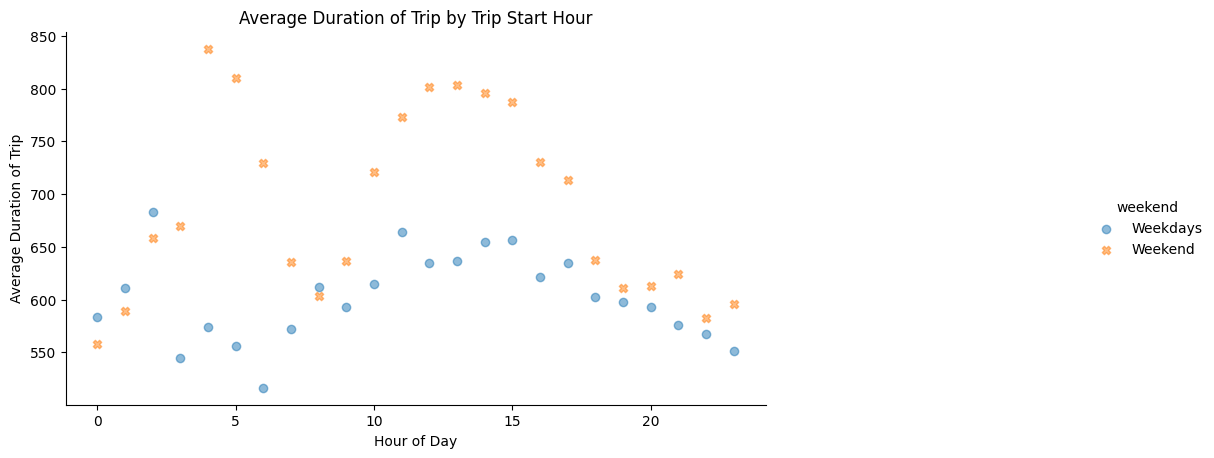

In [10]:
#scatter plot of Station vs Count of Station by Day Name
g = sb.FacetGrid(data = df_hours_duration, hue = 'weekend', hue_kws=dict(marker=["o","X"]))
g.map(plt.scatter, 'start_hour', 'avg_duration', alpha=0.5)
g.add_legend()

## Set Plot Dimensions - FIGURE LEVEL
g.fig.set_size_inches(15, 5)
#add xlabel, ylabel and title
plt.title('Average Duration of Trip by Trip Start Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Average Duration of Trip')

plt.show()

## Overall Conclusion

> Investigated the relationship between day of the week and duration / number of trip. The results showed that weekdays riders completed the trip faster than weekend bike riders. And number of ride at weekend is less than weekdays. It implies that weekned riders are more tend to enjoy their trip.

> Second investigation was about relationship between hours of the day and duration of trip. Even the number of rides is highest between **10:00 and 16:00** on weekends, high duraiton time is between **10:00 - 16:00 and 04:00 - 06:00**. Additionally, even the number of rides is highest between **07:00 - 9:00 and 16:00 - 18:00** on weekdays, high duraiton time is between **11:00 - 15:00 and 01:00 - 02:00**. The longer driving time after midnight may be due to the inaccessibility of public transportation.

In [11]:
!jupyter nbconvert Part_II_slide_deck_template.ipynb --to slides --post serve --no-input --no-prompt

^C
